In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
read_data = pd.read_csv('groceries.csv',sep=',')
read_data = read_data.iloc[:,1:]
read_data = read_data.replace(to_replace = np.nan, value = 'nan')
read_data.shape

(9835, 32)

In [5]:
read_data['Item 1'][0]

'citrus fruit'

In [6]:
transactions = []
for i in range(0, 9835):
    temp=[]
    for u in read_data.columns:
        if read_data[u][i]!='nan':
            temp.append(read_data[u][i])
        transactions.append(temp)
TE = TransactionEncoder()
dataset = TE.fit(transactions).transform(transactions)
new_read_data = pd.DataFrame(dataset,columns = TE.columns_)
itemset = apriori(new_read_data,min_support=0.05,use_colnames=True)
itemset

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [7]:
association_rules(itemset,metric='confidence',min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


<BarContainer object of 31 artists>

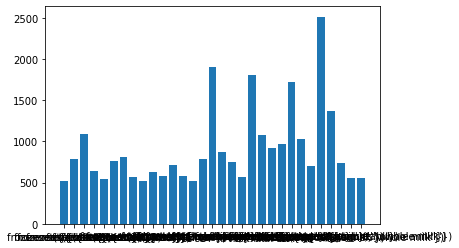

In [8]:
sp = [float(itemset['support'][i])*9835 for i in range(0,itemset.shape[0])]
items = [str(itemset['itemsets'][i]) for i in range(0,itemset.shape[0])]
plt.bar(items,sp)
#plt.xticklab

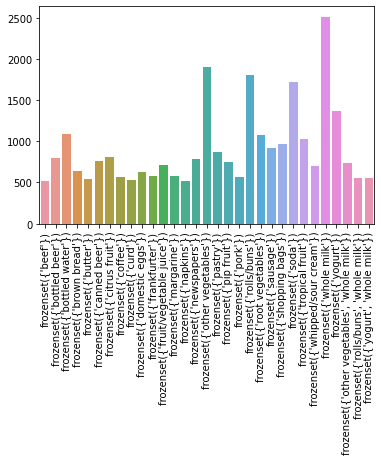

In [9]:
bar = sns.barplot(x=items,y=sp)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90);

In [10]:
float(itemset['support'][2])

0.11052364006100661

In [11]:
association_rules(itemset,metric='confidence',min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
